In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import exp

#preprocessing

In [2]:
df = pd.read_csv("L:/bucket/kinetics/0838_004_exercise.txt", sep='\t')

In [3]:
df = df.filter(['TCD1'])

In [4]:
df = df.drop([df.index[0], df.index[1]])

In [5]:
df['TCD1'] = df['TCD1'].astype(float)

In [6]:
df = df.reset_index()

In [7]:
df.drop(['index'], axis=1, inplace=True)

In [8]:
tcd1= df.filter(['TCD1'])

time1=3
timearray=[]
for i in tcd1.iterrows():
    timearray.append(time1)
    time1+=3
df['Time']=timearray
print(tcd1)
print(df)

        TCD1
0    45.2812
1    46.9742
2    44.3778
3    43.4202
4    43.1326
..       ...
215  53.7634
216  50.0684
217  42.8186
218  40.8370
219  47.6285

[220 rows x 1 columns]
        TCD1  Time
0    45.2812     3
1    46.9742     6
2    44.3778     9
3    43.4202    12
4    43.1326    15
..       ...   ...
215  53.7634   648
216  50.0684   651
217  42.8186   654
218  40.8370   657
219  47.6285   660

[220 rows x 2 columns]


        TCD1  Time
0    45.2812     3
1    46.9742     6
2    44.3778     9
3    43.4202    12
4    43.1326    15
..       ...   ...
215  53.7634   648
216  50.0684   651
217  42.8186   654
218  40.8370   657
219  47.6285   660

[220 rows x 2 columns]


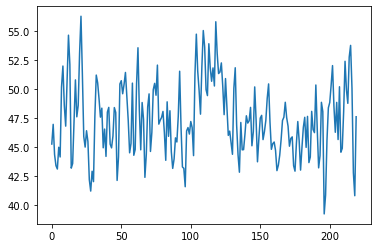

In [9]:
plt.plot(df['TCD1'])
print(df)

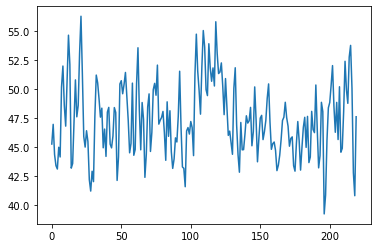

In [10]:
plt.plot(df['TCD1'])

#Curve fitting

In [11]:
def func(y0, amp, TD, tau, t):
    return y0 + amp * (1 - exp((-t-TD)/tau))

In [12]:
xdata = df.index.values
ydata = df['TCD1']

In [13]:
popt, pcov = curve_fit(func, xdata, ydata)

In [14]:
y0 = popt[0]
amp = popt[1]
TD = popt[2]
tau = popt[3]
t= df['Time']
print(y0)
print(amp)
print(TD)
print(tau)

-75.3300974832472
246.34154023844926
282.9772408556883
246.34153908702842


In [15]:
def func(y0, amp, TD, tau, t):
    return y0 + amp * (1 - exp(((t*-1)-TD)/tau))
my_time= df['Time']
x=[]
i=1
while i <= 666:
    x.append(i)
    i+=1
y = []
for r in my_time:
    myval = y0 + amp * (1 - exp(((r*-1)-TD)/tau))
    float(myval)
    y.append(myval)
print(my_time)
print(y)

0        3
1        6
2        9
3       12
4       15
      ... 
215    648
216    651
217    654
218    657
219    660
Name: Time, Length: 220, dtype: int64
[93.85604087946744, 94.7899576196853, 95.71256989571198, 96.62401454084873, 97.52442673211733, 98.41394001030817, 99.29268629978593, 100.16079592805535, 101.01839764509008, 101.86561864242783, 102.70258457203424, 103.52941956493824, 104.34624624964219, 105.1531857703089, 105.95035780472877, 106.73788058206905, 107.51587090040864, 108.28444414406049, 109.04371430068439, 109.79379397819234, 110.53479442144977, 111.26682552877428, 111.98999586823454, 112.70441269375242, 113.41018196100963, 114.10740834316225, 114.79619524636483, 115.47664482510656, 116.14885799736201, 116.81293445955826, 117.46897270136098, 118.11707002028145, 118.75732253610694, 119.38982520515616, 120.01467183436249, 120.63195509518631, 121.24176653735942, 121.84419660246267, 122.43933463733948, 123.02726890734694, 123.60808660944654, 124.18187388513637, 124.74871

In [16]:
df=df.set_index(df['Time'])
df['Y']=y

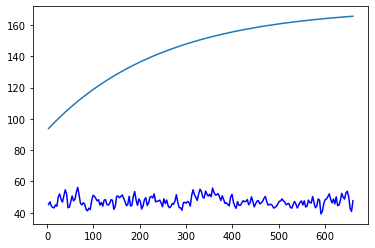

In [17]:
plt.plot(df['TCD1'], 'b-')
plt.plot(my_time, y, label='y = y0 + amp * (1 - exp((-t-TD)/tau))')

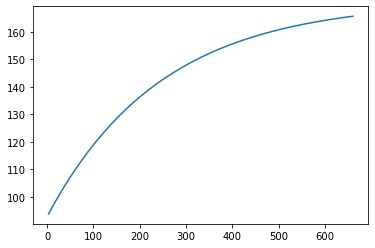

In [18]:
plt.plot(my_time, y, label='y = y0 + amp * (1 - exp((-t-TD)/tau))')